* Most machine learning algorithms have affinity towards normal distribution based on their core design
* It means that if the features are normally distributed we tend to get better results
* BUT IN REAL WORLD DATA WE SHELDON GET ANYTHING CLOSE ENOUGH TO A normal distibution

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [3]:
boston_data = load_boston()
boston_data

C:\Users\DEVVRAK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
X = boston_data.data
Y = boston_data.target

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
print("R2 Score: {0: .2f}".format(regressor.score(x_test, y_test)))

R2 Score:  0.79


In [14]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

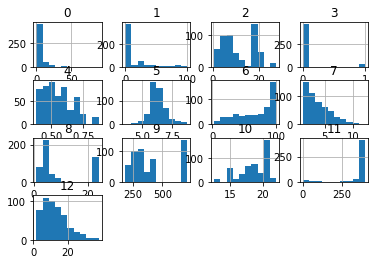

In [18]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.hist()

## QuantileTransformer

In [21]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer  # only work on numerical data

qt = QuantileTransformer(n_quantiles=len(X), output_distribution='normal')
pt = PowerTransformer()

In [23]:
X_tf = qt.fit_transform(X)
X_tf

array([[-5.19933758,  0.70121585, -1.48097265, ..., -1.06007845,
         5.19933758, -1.17103637],
       [-1.66934259, -5.19933758, -0.26104292, ..., -0.4682526 ,
         5.19933758, -0.33106676],
       [-1.68968043, -5.19933758, -0.26104292, ..., -0.4682526 ,
         0.14193834, -1.51137447],
       ...,
       [-0.89221589, -5.19933758,  0.21762312, ...,  1.53512765,
         5.19933758, -0.98473862],
       [-0.45996053, -5.19933758,  0.21762312, ...,  1.53512765,
         0.24055376, -0.79991098],
       [-1.08656811, -5.19933758,  0.21762312, ...,  1.53512765,
         5.19933758, -0.49332612]])

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

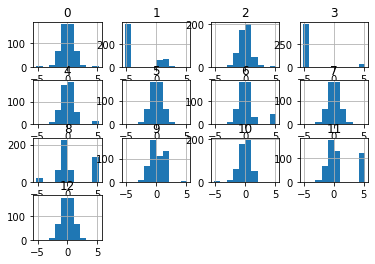

In [24]:
boston_df_transformed = pd.DataFrame(X_tf)
boston_df_transformed.hist()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, Y) 

In [29]:
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [30]:
print("R2 Score: {0: .2f}".format(regressor.score(X_test, Y_test)))

R2 Score:  0.75


## PowerTransformer

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

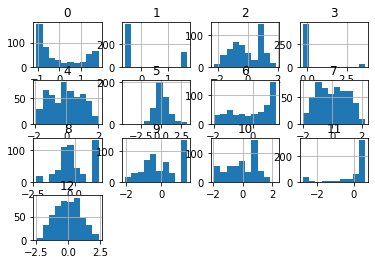

In [31]:
X_tf_pt = pt.fit_transform(X)
boston_df_transformed = pd.DataFrame(X_tf_pt)
boston_df_transformed.hist()

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_pt, Y) 

In [33]:
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [34]:
print("R2 Score: {0: .2f}".format(regressor.score(X_test, Y_test)))

R2 Score:  0.82


## Transfromed Target Regressor

In [49]:
from sklearn.compose import TransformedTargetRegressor

qt = QuantileTransformer(n_quantiles=len(x_train), output_distribution='normal')
X_tf = qt.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, Y)
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

regr = TransformedTargetRegressor(regressor=regressor, transformer=qt)
regr.fit(X_train, Y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(n_quantiles=379,
                                                           output_distribution='normal'))

In [50]:
pred = regr.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, pred))

0.6786921689093605


In [52]:
pt = PowerTransformer()
X_tf_pt = pt.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_pt, Y)
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

regr = TransformedTargetRegressor(regressor=regressor, transformer=pt)
regr.fit(X_train, Y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=PowerTransformer())

In [53]:
pred = regr.predict(X_test)
print(r2_score(Y_test, pred))

0.7809844721978406
